# Análise Exploratória de Entidades Nomeadas em Prontuários Médicos

Este notebook realiza uma análise exploratória para identificar as doenças e substâncias químicas mais frequentes nos prontuários médicos. O objetivo é contar a frequência de cada entidade e visualizá-las por meio de gráficos.

## 1. Importação das Bibliotecas
As bibliotecas necessárias incluem:
- **pandas**: Para manipulação e análise dos dados;
- **matplotlib** e **seaborn**: Para visualização gráfica;
- **wordcloud**: Para gerar a nuvem de palavras.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 2. Carregamento do Arquivo CSV
O arquivo `.csv` contém as seguintes colunas principais:
- **File**: Nome do prontuário;
- **Entity**: Nome da entidade (doença ou substância química);
- **Label**: Categoria da entidade (DISEASE ou CHEMICAL).

In [2]:
# Carregamento do arquivo CSV
df = pd.read_csv('C:\\Users\\Usuario\\Desktop\\NLP_IN_EHR\\ner_results_unique.csv')
df.head()

,File,Entity,Label
0,prontuario_Abram_Schinner.pdf,overdose,DISEASE
1,prontuario_Abram_Schinner.pdf,bronchitis,DISEASE
2,prontuario_Abram_Schinner.pdf,acetaminophen,CHEMICAL
3,prontuario_Abram_Schinner.pdf,dextromethorphan hydrobromide,CHEMICAL
4,prontuario_Abram_Schinner.pdf,doxylamine succinate,CHEMICAL


## 3. Contagem de Frequência das Entidades
Agrupamos os dados por entidade e calculamos a frequência de cada uma.

In [3]:
# Contagem de frequência de entidades
entity_counts = df['Entity'].value_counts().reset_index()
entity_counts.columns = ['Entity', 'Frequency']
entity_counts.head(10)


,Entity,Frequency
0,sinusitis,775
1,viral sinusitis,684
2,acetaminophen,608
3,pharyngitis,452
4,obesity,432
5,bronchitis,424
6,diabetes,363
7,hypertension,291
8,anemia,289
9,amoxicillin,283


## 4. Gráfico de Barras das Entidades Mais Frequentes
Visualizamos as entidades mais comuns em forma de gráfico de barras.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18600\1547725761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_entities, x='Frequency', y='Entity', palette='viridis')


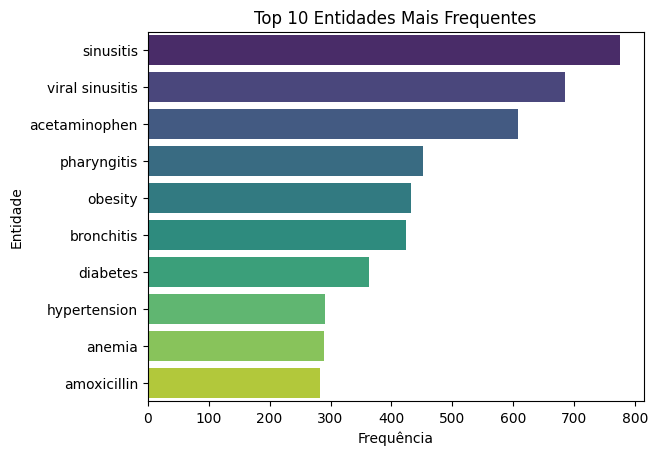

In [4]:
# Gráfico de barras para as 10 entidades mais frequentes
top_entities = entity_counts.head(10)
sns.barplot(data=top_entities, x='Frequency', y='Entity', palette='viridis')
plt.title('Top 10 Entidades Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Entidade')
plt.show()

## 5. Nuvem de Palavras para Visualização das Entidades
Uma nuvem de palavras é criada para destacar as entidades mais frequentes.

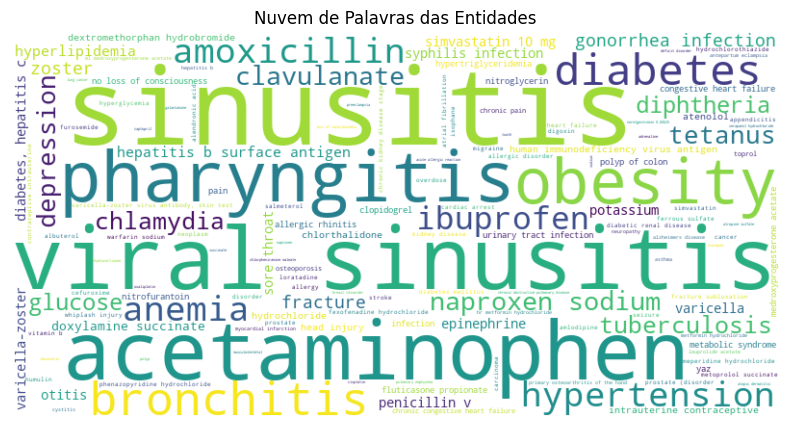

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(entity_counts['Entity'], entity_counts['Frequency'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Entidades')
plt.show()

## 5. ANALSIE SIMPLES DOENÇA

In [17]:
# Importação das Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [19]:
# Carregamento do arquivo CSV
df = pd.read_csv('C:\\Users\\Usuario\\Desktop\\NLP_IN_EHR\\ner_results_unique.csv')
df.head()

,File,Entity,Label
0,prontuario_Abram_Schinner.pdf,overdose,DISEASE
1,prontuario_Abram_Schinner.pdf,bronchitis,DISEASE
2,prontuario_Abram_Schinner.pdf,acetaminophen,CHEMICAL
3,prontuario_Abram_Schinner.pdf,dextromethorphan hydrobromide,CHEMICAL
4,prontuario_Abram_Schinner.pdf,doxylamine succinate,CHEMICAL


In [20]:
disease_df = df[df['Label'] == 'DISEASE']

In [21]:
disease_counts = disease_df['Entity'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Frequency']
disease_counts.head(10)

,Disease,Frequency
0,sinusitis,775
1,viral sinusitis,684
2,pharyngitis,452
3,obesity,432
4,bronchitis,424
5,diabetes,363
6,hypertension,291
7,anemia,289
8,depression,190
9,tetanus,185


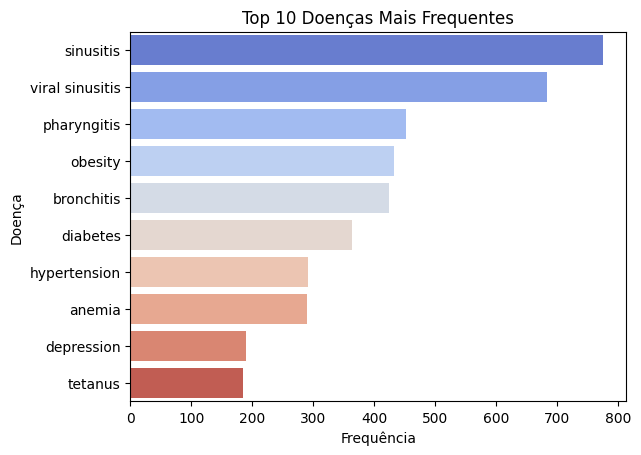

In [22]:
top_diseases = disease_counts.head(10)
sns.barplot(data=top_diseases, x='Frequency', y='Disease', hue='Disease', dodge=False, palette='coolwarm')
plt.title('Top 10 Doenças Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Doença')
plt.legend([], [], frameon=False)  # Remove a legenda desnecessária
plt.show()

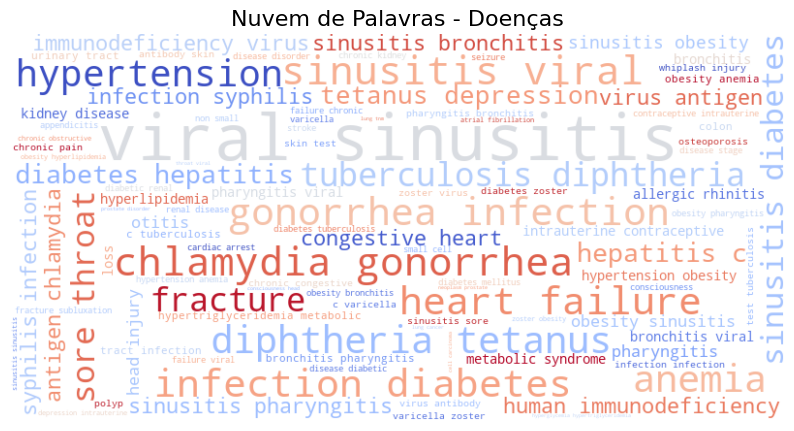

In [ ]:
disease_text = " ".join(disease_df['Entity'].values)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='coolwarm', 
    max_words=100
).generate(disease_text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Doenças", fontsize=16)
plt.show()

## Analise Simples para Substâncias Químicas

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
# Carregamento do arquivo CSV
df = pd.read_csv('C:\\Users\\Usuario\\Desktop\\NLP_IN_EHR\\ner_results_unique.csv')  # Substitua pelo caminho correto
df.head()

,File,Entity,Label
0,prontuario_Abram_Schinner.pdf,overdose,DISEASE
1,prontuario_Abram_Schinner.pdf,bronchitis,DISEASE
2,prontuario_Abram_Schinner.pdf,acetaminophen,CHEMICAL
3,prontuario_Abram_Schinner.pdf,dextromethorphan hydrobromide,CHEMICAL
4,prontuario_Abram_Schinner.pdf,doxylamine succinate,CHEMICAL


In [27]:
# Filtrar apenas as entidades do tipo CHEMICAL
chemical_df = df[df['Label'] == 'CHEMICAL']

In [28]:
chemical_counts = chemical_df['Entity'].value_counts().reset_index()
chemical_counts.columns = ['Chemical', 'Frequency']
chemical_counts.head(10)

,Chemical,Frequency
0,acetaminophen,608
1,amoxicillin,283
2,ibuprofen,231
3,naproxen sodium,220
4,clavulanate,213
5,glucose,156
6,hepatitis b surface antigen,138
7,simvastatin 10 mg,123
8,potassium,117
9,epinephrine,112


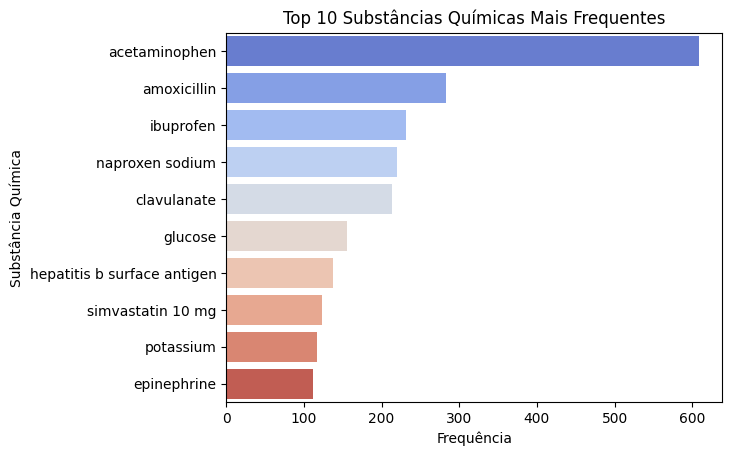

In [30]:
top_chemicals = chemical_counts.head(10)
sns.barplot(data=top_chemicals, x='Frequency', y='Chemical', hue='Chemical', dodge=False, palette='coolwarm')
plt.title('Top 10 Substâncias Químicas Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Substância Química')
plt.legend([],[], frameon=False)
plt.show()


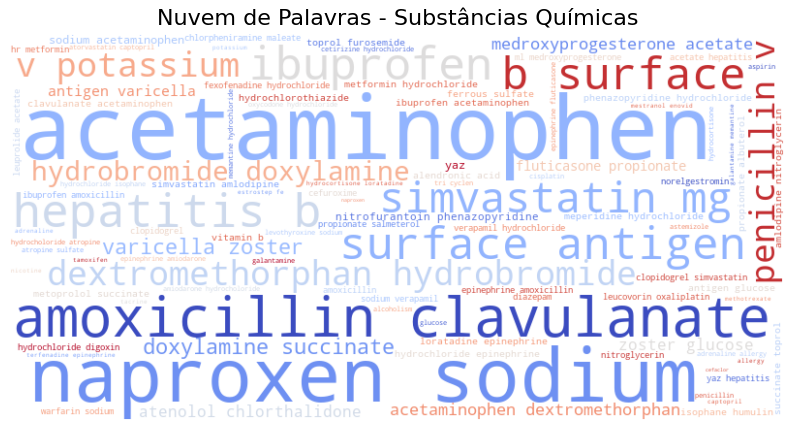

In [ ]:
chemical_text = " ".join(chemical_df['Entity'].values)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='coolwarm', 
    max_words=100
).generate(chemical_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Substâncias Químicas", fontsize=16)
plt.show()
